In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analysis import load_data, get_flipped, get_trial_stats, get_correct_scores, get_flipping_stats

In [2]:
test_df, experiment_df = load_data()

In [ ]:
test_df.shape[0]

In [ ]:
test_df.info()

In [ ]:
test_df.groupby("subject")["correct"].value_counts().xs(True, level=1)

In [ ]:
experiment_df.groupby("subject")["correct"].value_counts()

In [ ]:
test_df.groupby("subject")["correct"].value_counts(normalize=True).xs(True,level=1).mean()

In [ ]:
experiment_df[experiment_df["rt"] < float("inf")].groupby("subject")["rt"].describe()

In [ ]:
experiment_df.groupby("subject")["flipped"].value_counts()

In [ ]:
experiment_df[experiment_df["flipped"] == True]

In [ ]:
experiment_df["subject"].value_counts()

In [10]:
df = get_flipped(test_df, is_test=True)
get_correct_scores(df)

{'count': subject
 subject_0    8
 subject_1    4
 subject_2    2
 subject_3    3
 subject_4    2
 subject_5    2
 subject_6    5
 Name: correct, dtype: int64,
 'frequency': subject
 subject_0    0.888889
 subject_1    0.666667
 subject_2    0.666667
 subject_3    0.750000
 subject_4    0.400000
 subject_5    0.500000
 subject_6    1.000000
 Name: correct, dtype: float64,
 'mean': 0.696031746031746,
 'std': 0.2082830627179453}

In [11]:
get_correct_scores(test_df)

{'count': subject
 subject_0    15
 subject_1     9
 subject_2     2
 subject_3     6
 subject_4     4
 subject_5     3
 subject_6     7
 Name: correct, dtype: int64,
 'frequency': subject
 subject_0    0.833333
 subject_1    0.692308
 subject_2    0.285714
 subject_3    0.666667
 subject_4    0.363636
 subject_5    0.375000
 subject_6    0.636364
 Name: correct, dtype: float64,
 'mean': 0.5504317111459968,
 'std': 0.2068820456916505}

In [ ]:
experiment_df.groupby("subject")["flipped"].value_counts(normalize=True).xs(True,level=1)

In [ ]:
print(get_correct_scores(experiment_df))

In [3]:
print(get_flipping_stats(experiment_df, is_test=True))

{'count': subject_4    62
subject_0    59
subject_3    52
subject_6    52
subject_5    37
subject_1    17
subject_2    17
Name: subject, dtype: int64, 'frequency': [0.59, 0.22972972972972974, 0.25757575757575757, 0.49523809523809526, 0.5081967213114754, 0.43023255813953487, 0.46846846846846846], 'mean': 0.42563447578043734, 'std': 0.13363851076784034}


subject_0    18
subject_1    13
subject_2     7
subject_3     9
subject_4    11
subject_5     8
subject_6    11
Name: subject, dtype: int64
subject_0    100
subject_1     74
subject_2     66
subject_3    105
subject_4    122
subject_5     86
subject_6    111
Name: subject, dtype: int64


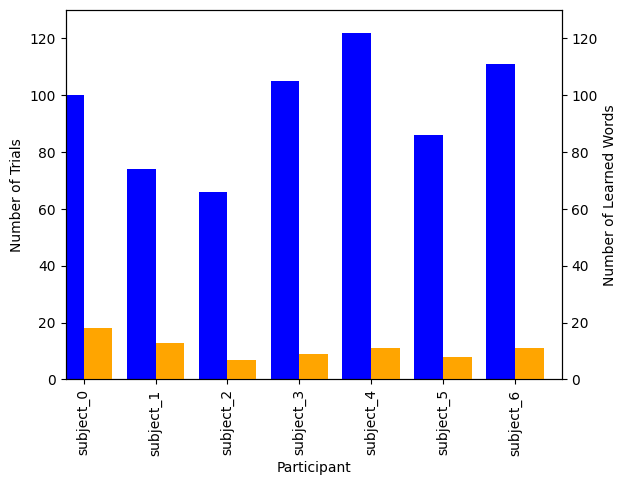

In [30]:
exp_stats = get_trial_stats(experiment_df)

test_stats = get_trial_stats(test_df)

print(test_stats["count"])
print(exp_stats["count"])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

exp_stats["count"].plot(kind="bar", color="blue", ax=ax1, width = 0.4, position=1)

test_stats["count"].plot(kind="bar", color="orange", ax=ax2, width = 0.4, position=0)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Number of Trials")
ax2.set_ylabel("Number of Learned Words")
ax2.set_ybound(upper=130)
ax1.set_ybound(upper=130)

fig.savefig("trials.png", dpi=300, bbox_inches = "tight", transparent=True)

subject
subject_0    0.833333
subject_1    0.692308
subject_2    0.285714
subject_3    0.666667
subject_4    0.363636
subject_5    0.375000
subject_6    0.636364
Name: correct, dtype: float64
subject
subject_0    0.800000
subject_1    0.810811
subject_2    0.439394
subject_3    0.428571
subject_4    0.254098
subject_5    0.279070
subject_6    0.360360
Name: correct, dtype: float64


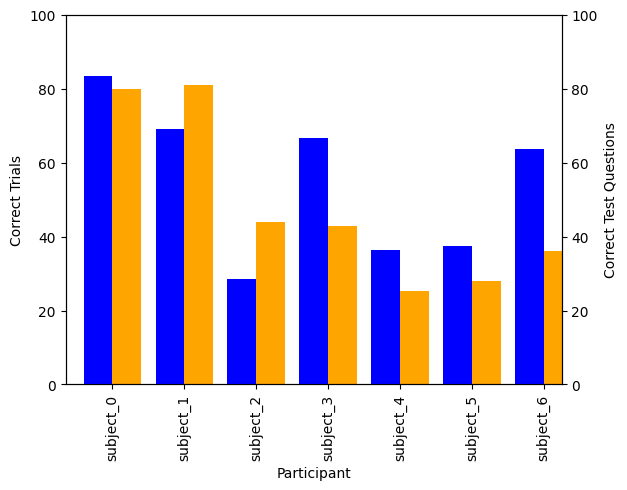

In [44]:
exp_stats = get_correct_scores(experiment_df)

test_stats = get_correct_scores(test_df)

print(test_stats["frequency"])
print(exp_stats["frequency"])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

test_freq_perc = test_stats["frequency"] * 100

exp_freq_perc = exp_stats["frequency"] * 100

exp_freq_perc.plot(kind="bar", color="orange", ax=ax1, width = 0.4, position=0)

test_freq_perc.plot(kind="bar", color="blue", ax=ax2, width = 0.4, position=1)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Correct Trials")
ax2.set_ylabel("Correct Test Questions")
ax2.set_ybound(upper=100)
ax1.set_ybound(upper=100)

fig.savefig("correct.png", dpi=300, bbox_inches = "tight", transparent=True)

subject
subject_0    0.833333
subject_1    0.692308
subject_2    0.285714
subject_3    0.666667
subject_4    0.363636
subject_5    0.375000
subject_6    0.636364
Name: correct, dtype: float64
subject
subject_0    0.800000
subject_1    0.810811
subject_2    0.439394
subject_3    0.428571
subject_4    0.254098
subject_5    0.279070
subject_6    0.360360
Name: correct, dtype: float64


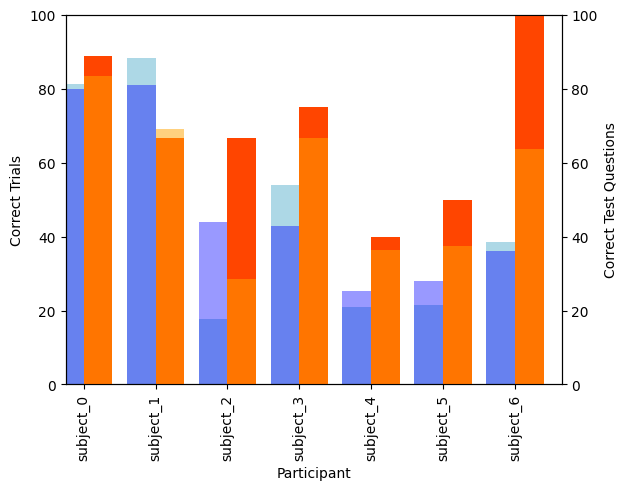

In [73]:
test_flipped = get_flipped(test_df, is_test=True)

exp_flipped = get_flipped(experiment_df)

exp_stats_flipped = get_correct_scores(exp_flipped)

test_stats_flipped = get_correct_scores(test_flipped)

exp_stats = get_correct_scores(experiment_df)

test_stats = get_correct_scores(test_df)

print(test_stats["frequency"])
print(exp_stats["frequency"])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

test_flip_freq_perc = test_stats_flipped["frequency"] * 100

exp_flip_freq_perc = exp_stats_flipped["frequency"] * 100

test_freq_perc = test_stats["frequency"] * 100

exp_freq_perc = exp_stats["frequency"] * 100


exp_flip_freq_perc.plot(kind="bar", color="lightblue", ax=ax1, width = 0.4, position=1)
exp_freq_perc.plot(kind="bar", color="blue", ax=ax1, width = 0.4, position=1, alpha=0.4)

test_flip_freq_perc.plot(kind="bar", color="orangered", ax=ax2, width = 0.4, position=0)
test_freq_perc.plot(kind="bar", color="orange", ax=ax2, width = 0.4, position=0, alpha=0.5)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Correct Trials")
ax2.set_ylabel("Correct Test Questions")
ax2.set_ybound(upper=100)
ax1.set_ybound(upper=100)

fig.savefig("correct_flipped2.png", dpi=300, bbox_inches = "tight", transparent=True)